In [104]:
import numpy as np
#from pylab import *
from matplotlib.pyplot import *
import matplotlib.pyplot as plt


plt.rcParams['text.usetex'] = True 
plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath'] 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.labelsize'] = 18


/var/folders/ct/fwqn0t4s4jn663rdyny5vjpr0000gn/T/ipykernel_9460/1724046248.py:8: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath']


# Figrure of Sensitiviy kernels of PEPS

/var/folders/ct/fwqn0t4s4jn663rdyny5vjpr0000gn/T/ipykernel_9460/2195500177.py:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


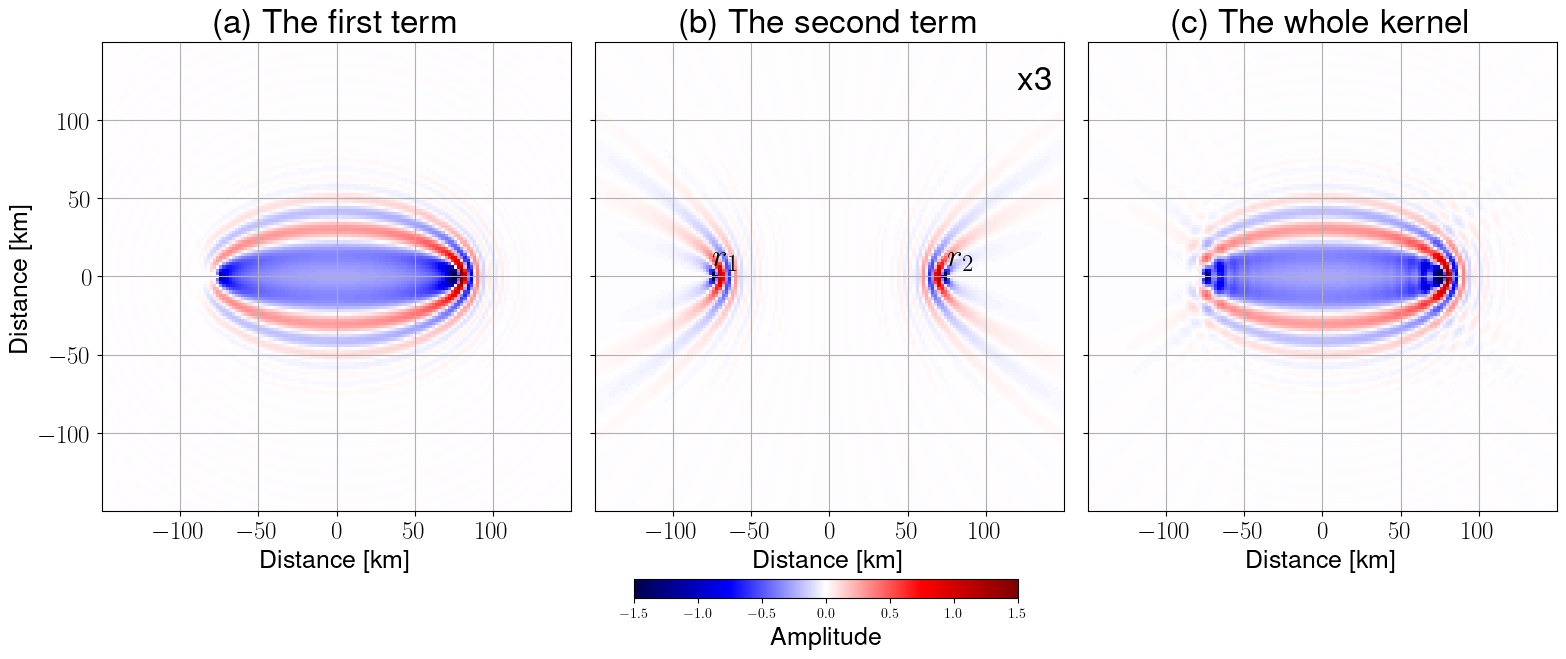

In [109]:
x = np.linspace(-150, 150, 151)
y = np.linspace(-150, 150, 151)
X, Y = np.meshgrid(x,y) 

X1, Y1 = -75., 0.
X2, Y2 =  75., 0.

r13 = np.sqrt((X-X1)**2+(Y-Y1)**2)
r23 = np.sqrt((X-X2)**2+(Y-Y2)**2)
r12 = np.sqrt((X1-X2)**2+(Y2-Y2)**2)

cosζ1,sinζ1 = (X-X1)/r13, (Y-Y1)/r13
cosζ2,sinζ2 = (X-X2)/r23, (Y-Y2)/r23
cos2ζ1,sin2ζ1 = cosζ1*cosζ1-sinζ1*sinζ1, 2*cosζ1*sinζ1
cos2ζ2,sin2ζ2 = cosζ2*cosζ2-sinζ2*sinζ2, 2*cosζ2*sinζ2

B1, B2 =  cosζ1*1+1.,  cosζ2*1+1.
B3, B4 = -cosζ1*1+1., -cosζ2*1+1.
B0 = 2.

Kern1, Kern2 = np.zeros(X.shape), np.zeros(X.shape)
for freq in np.arange(0.1,0.2,0.002):
    taper = np.sin((freq-0.1)/0.1*np.pi)
    ω = freq*2*np.pi
    k = ω/3
    coe=k**1.5*np.sqrt(r12)/np.sqrt(2*np.pi)
    Kern1 += -coe/np.sqrt(r13*r23)*np.cos(k*(r13+r23-r12)-np.pi/4.)*(B1+B2)/B0*taper
    Kern2 += -coe/np.sqrt(r13*r23)*np.sin(k*(-abs(r13-r23)+r12)+np.pi/4.)*(B4-B3)/B0/2*taper
    #Kern2 += -coe/np.sqrt(r13*r23)*np.sin(k*(r13-r23+r12)-np.pi/4.)*(B4-B3)/B0/2


fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True,figsize = (15,8))

axes[0].pcolormesh(X,Y,Kern1,vmin=-1.5,vmax=1.5,zorder=-10,cmap="seismic")
axes[0].grid()   
cb = axes[1].pcolormesh(X,Y,Kern2,vmin=-0.5,vmax=0.5,zorder=-10,cmap="seismic")
axes[1].grid()
cb = axes[2].pcolormesh(X,Y,Kern1+Kern2,vmin=-1.5,vmax=1.5,zorder=-10,cmap="seismic")
axes[2].grid()

#cbar_ax = fig.add_axes([0.3, 0.05, 0.3, 0.05])
#cbar = plt.colorbar(cb, ax=cbar_ax, pad=0.025, shrink=0.3,label="Amplitude",orientation='horizontal', location='bottom')
cbar = fig.colorbar(cb, ax=axes.ravel().tolist(), pad=0.025, shrink=0.33,label="Amplitude",orientation='horizontal', location='bottom')

axes[0].set_rasterization_zorder(-5)

for ax in axes: 
    ax.set_box_aspect(1)
    #ax.plot(X1,Y1,"*",color="white")
    #ax.plot(X2,Y2,"*",color="white")
    ax.set_xlabel("Distance [km]",fontsize="18")
    ax.set_xlim(-150,150)
    ax.set_ylim(-150,150)
    ax.set_xticks(np.arange(-100,150,50),fontsize=18)    
    ax.set_yticks(np.arange(-100,150,50))
    ax.tick_params(labelsize=18)

axes[0].set_title("(a) The first term",fontsize="24")
axes[1].set_title("(b) The second term",fontsize="24")
axes[2].set_title("(c) The whole kernel",fontsize="24")
axes[1].text(120,120,"x3",fontsize="24")

axes[1].text(X1,Y1+7,"$r_1$",fontsize="24")
axes[1].text(X2,Y2+7,"$r_2$",fontsize="24")
axes[0].set_ylabel("Distance [km]",fontsize="18")
#plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(left=0.03, right=1.0, bottom=0.31, top=0.995,wspace=0.05)

plt.savefig("Kern_mod.pdf",bbox_inches="tight",pad_inches=0)
fig.show()
